In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift

In [139]:
df_gyro = pd.read_csv("gyro_data.csv")
df_gyro

,gyro_x,gyro_y,gyro_z
0,-0.010174,0.022502,-0.000522
1,0.008148,-0.028474,-0.006978
2,-0.002898,0.023201,0.009662
3,-0.002744,-0.011388,-0.007823
4,0.010530,-0.003039,0.003586
...,...,...,...
10394,0.048628,0.054463,-0.003674
10395,0.020511,-0.006313,-0.010710
10396,0.009710,0.020821,-0.020443
10397,-0.049864,0.001303,0.012972


In [140]:
def printSignal(sig, N, s, mu, name):
    X = fft(sig)
    X = 2*np.abs(X) / N

    # Plot results
    fig = plt.figure(figsize=(16, 16), dpi=100)
    # Time: signal
    plt.subplot(3, 1, 1)
    plt.title('Signal' + ' ' + name)
    plt.plot(sig)
    plt.xlim([0, N-1])
    plt.xlabel('samples')
    plt.grid()

    # Freq: Spectrum
    plt.subplot(3, 1, 2)
    plt.title('Spectrum' + ' ' + name)
    plt.plot(X)
    plt.xlim([0, N//2-1])
    plt.xlabel('frequency')
    plt.grid()

    plt.subplot(3, 1, 3)
    plt.title('Probability density function' + ' ' + name)
    plt.xlabel('Value')
    plt.ylabel('Level')
    plt.hist(z, 50,color='C1', label=r'$\mu = %f, \sigma$ = %f' % (mu, s))
    plt.grid()
    plt.legend(loc='upper left', fontsize=16)
    plt.tight_layout()
    

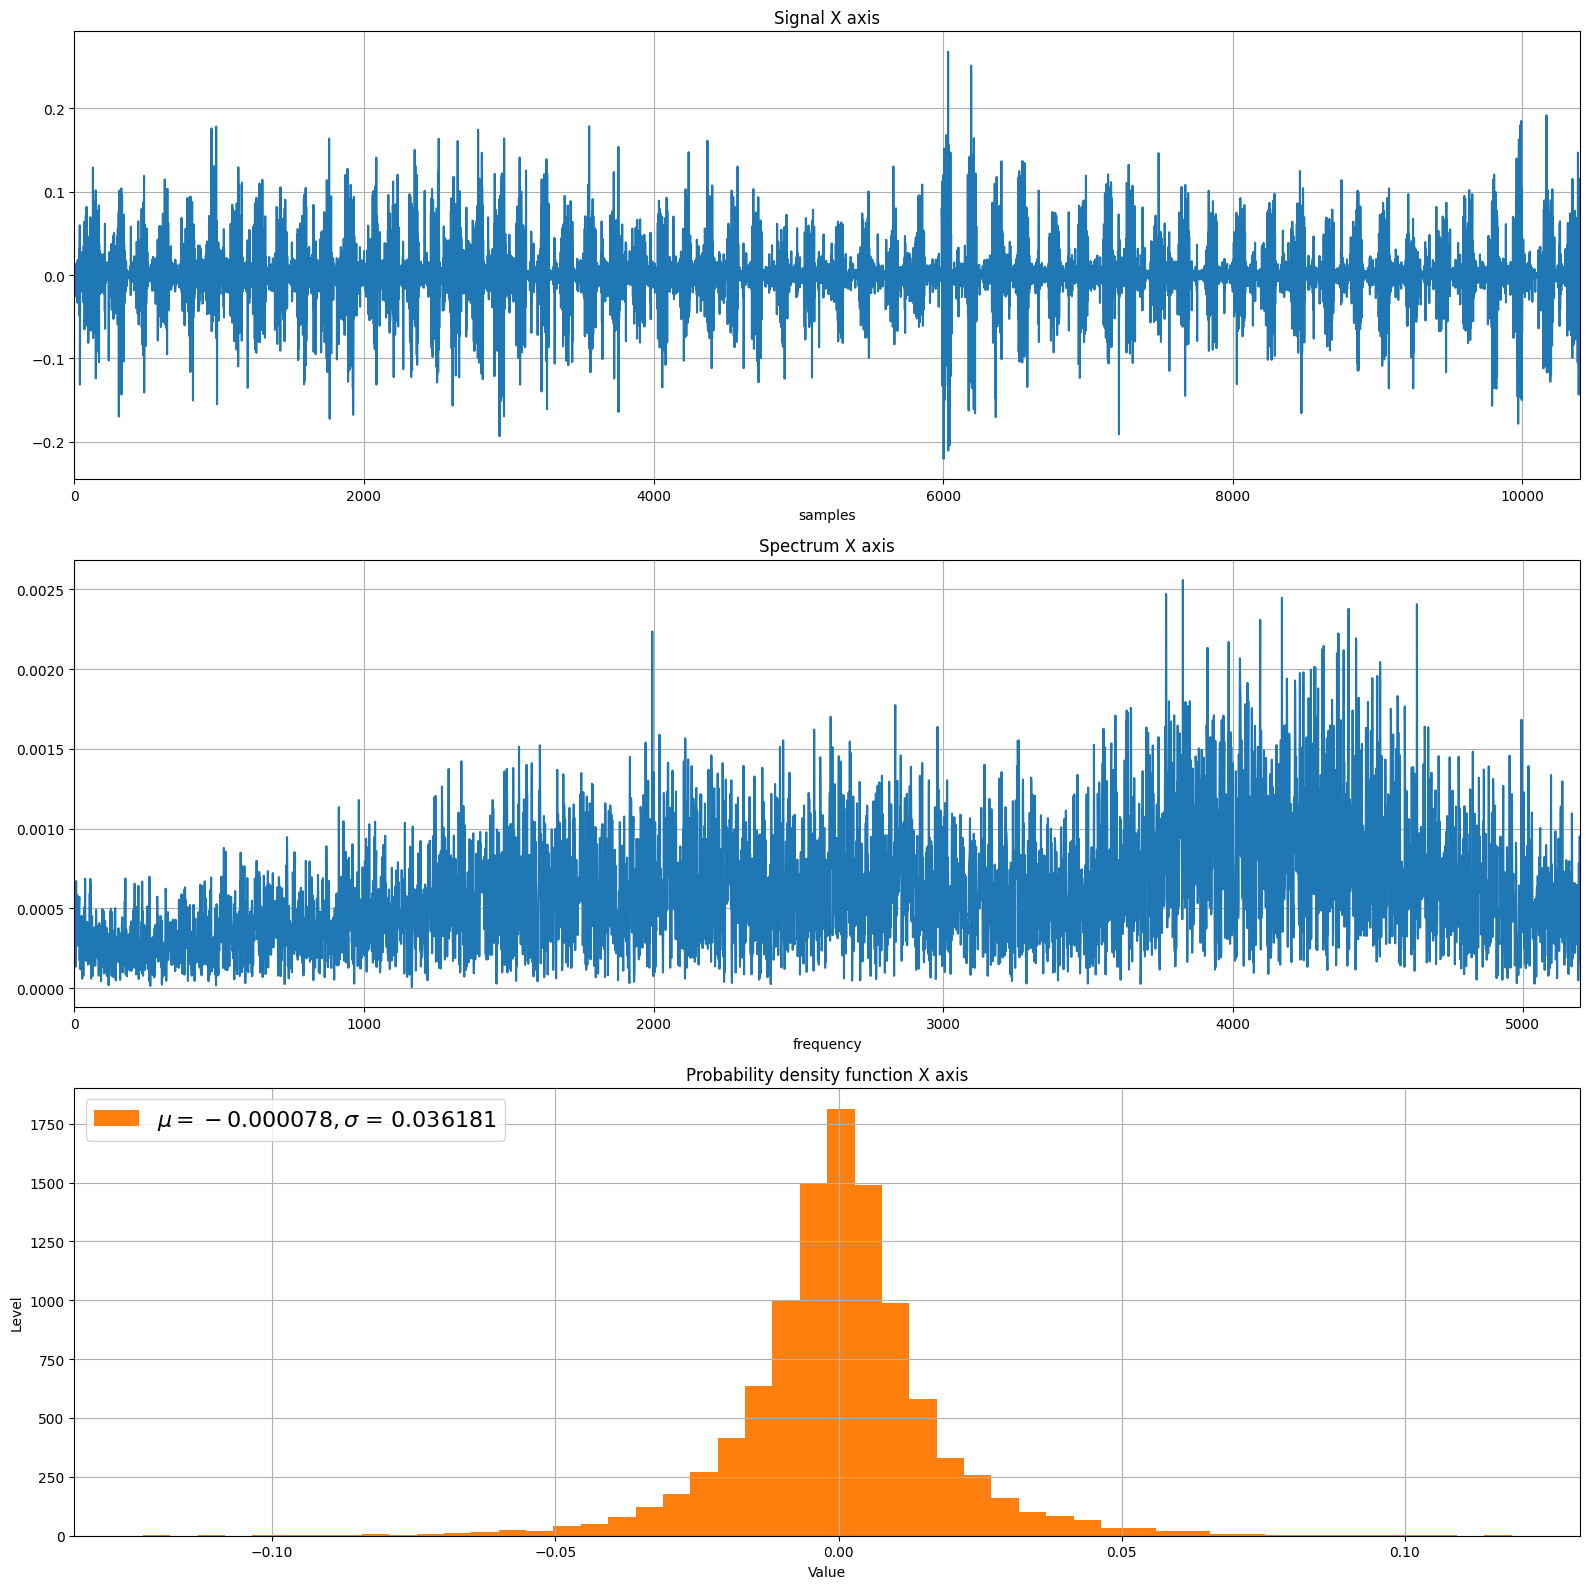

In [141]:
N = df_gyro['gyro_x'].count()
gyro_x = df_gyro['gyro_x'].to_numpy()

s = df_gyro['gyro_x'].std()
mu = df_gyro['gyro_x'].mean()    
printSignal(gyro_x, N, s, mu, 'X axis')  

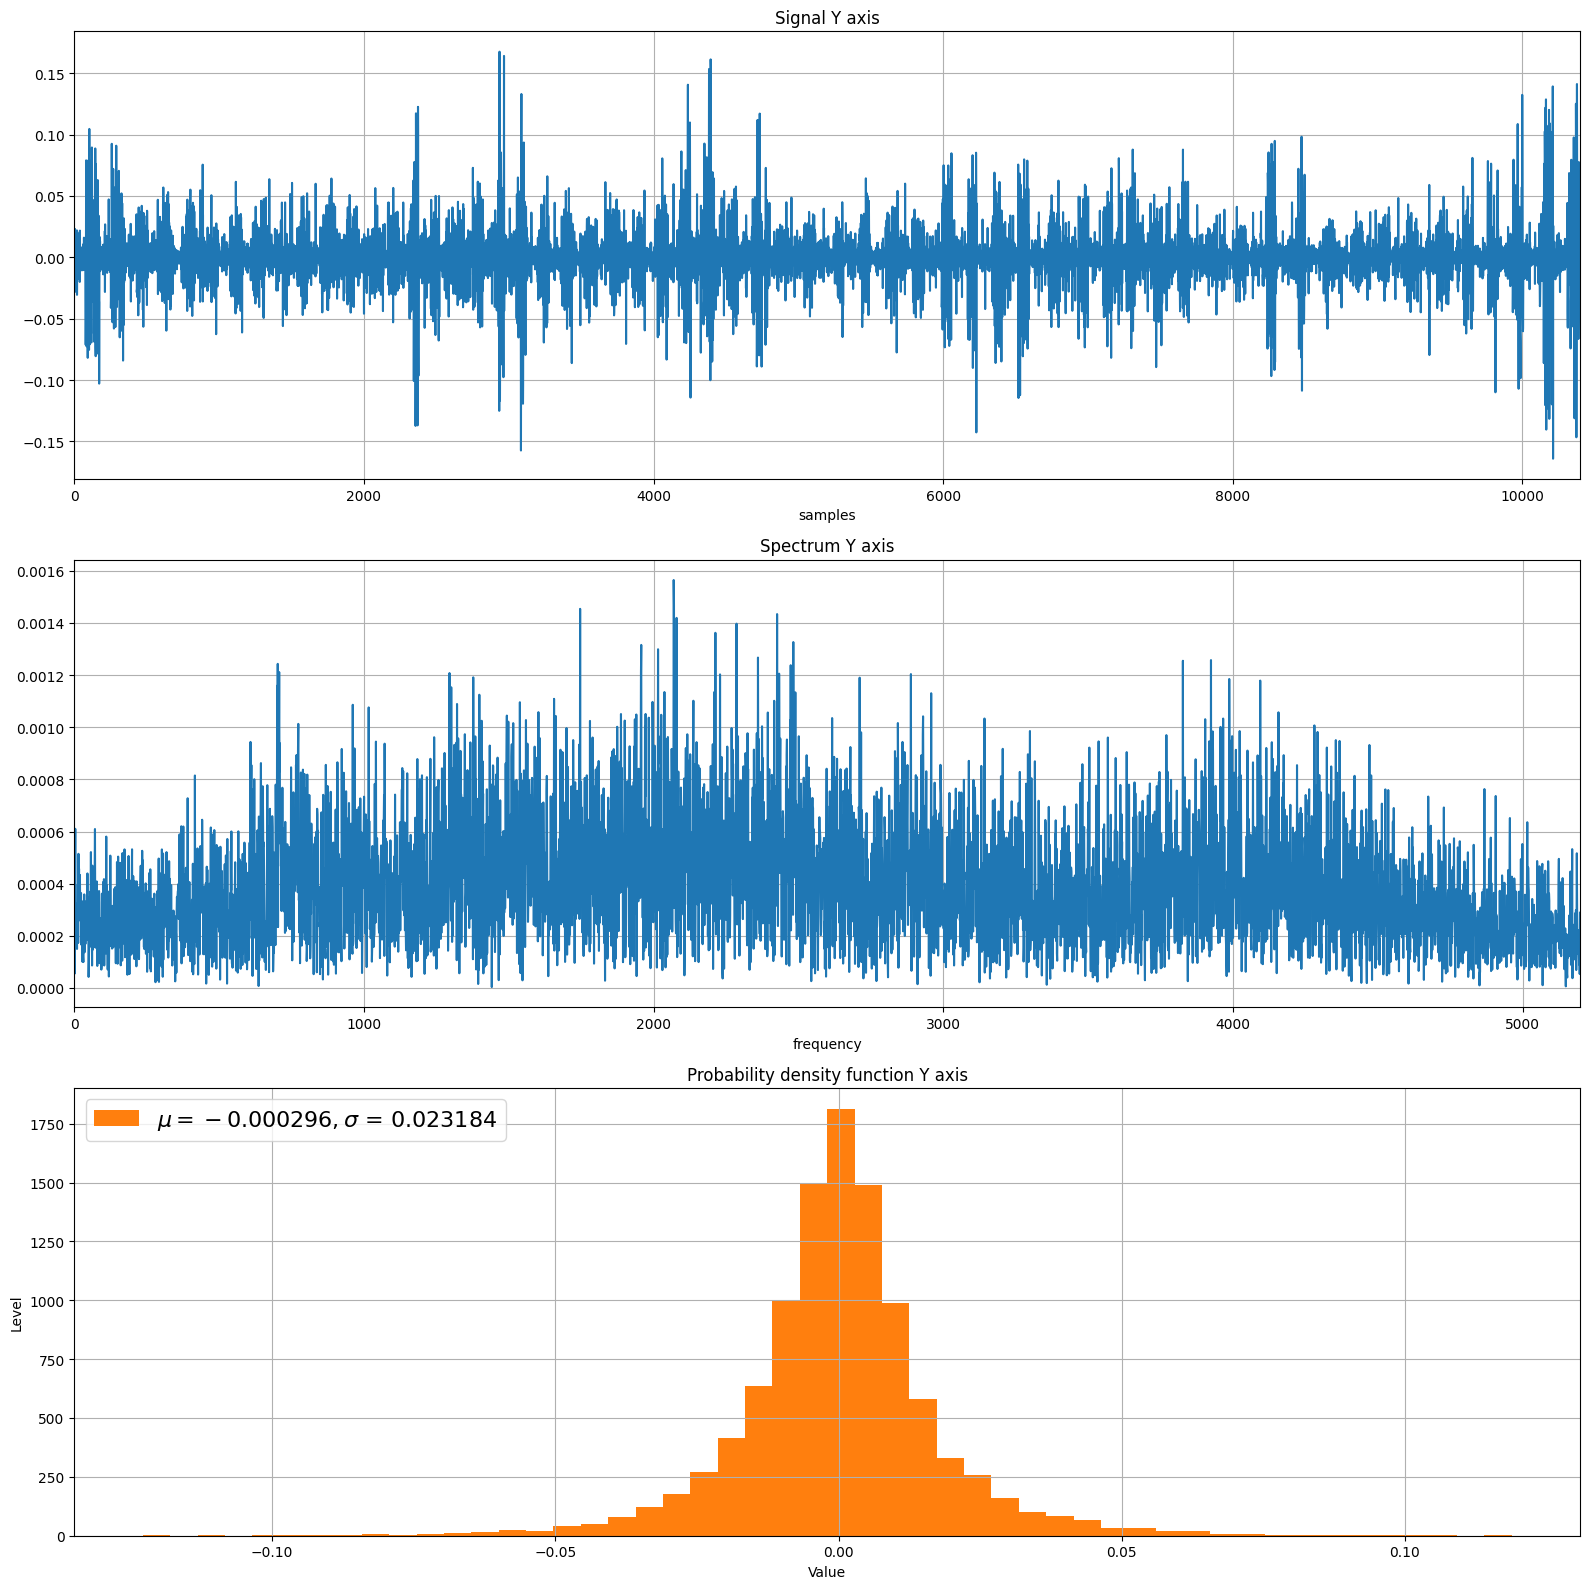

In [142]:
N = df_gyro['gyro_y'].count()
gyro_y = df_gyro['gyro_y'].to_numpy()

s = df_gyro['gyro_y'].std()
mu = df_gyro['gyro_y'].mean()    
printSignal(gyro_y, N, s, mu, 'Y axis')  

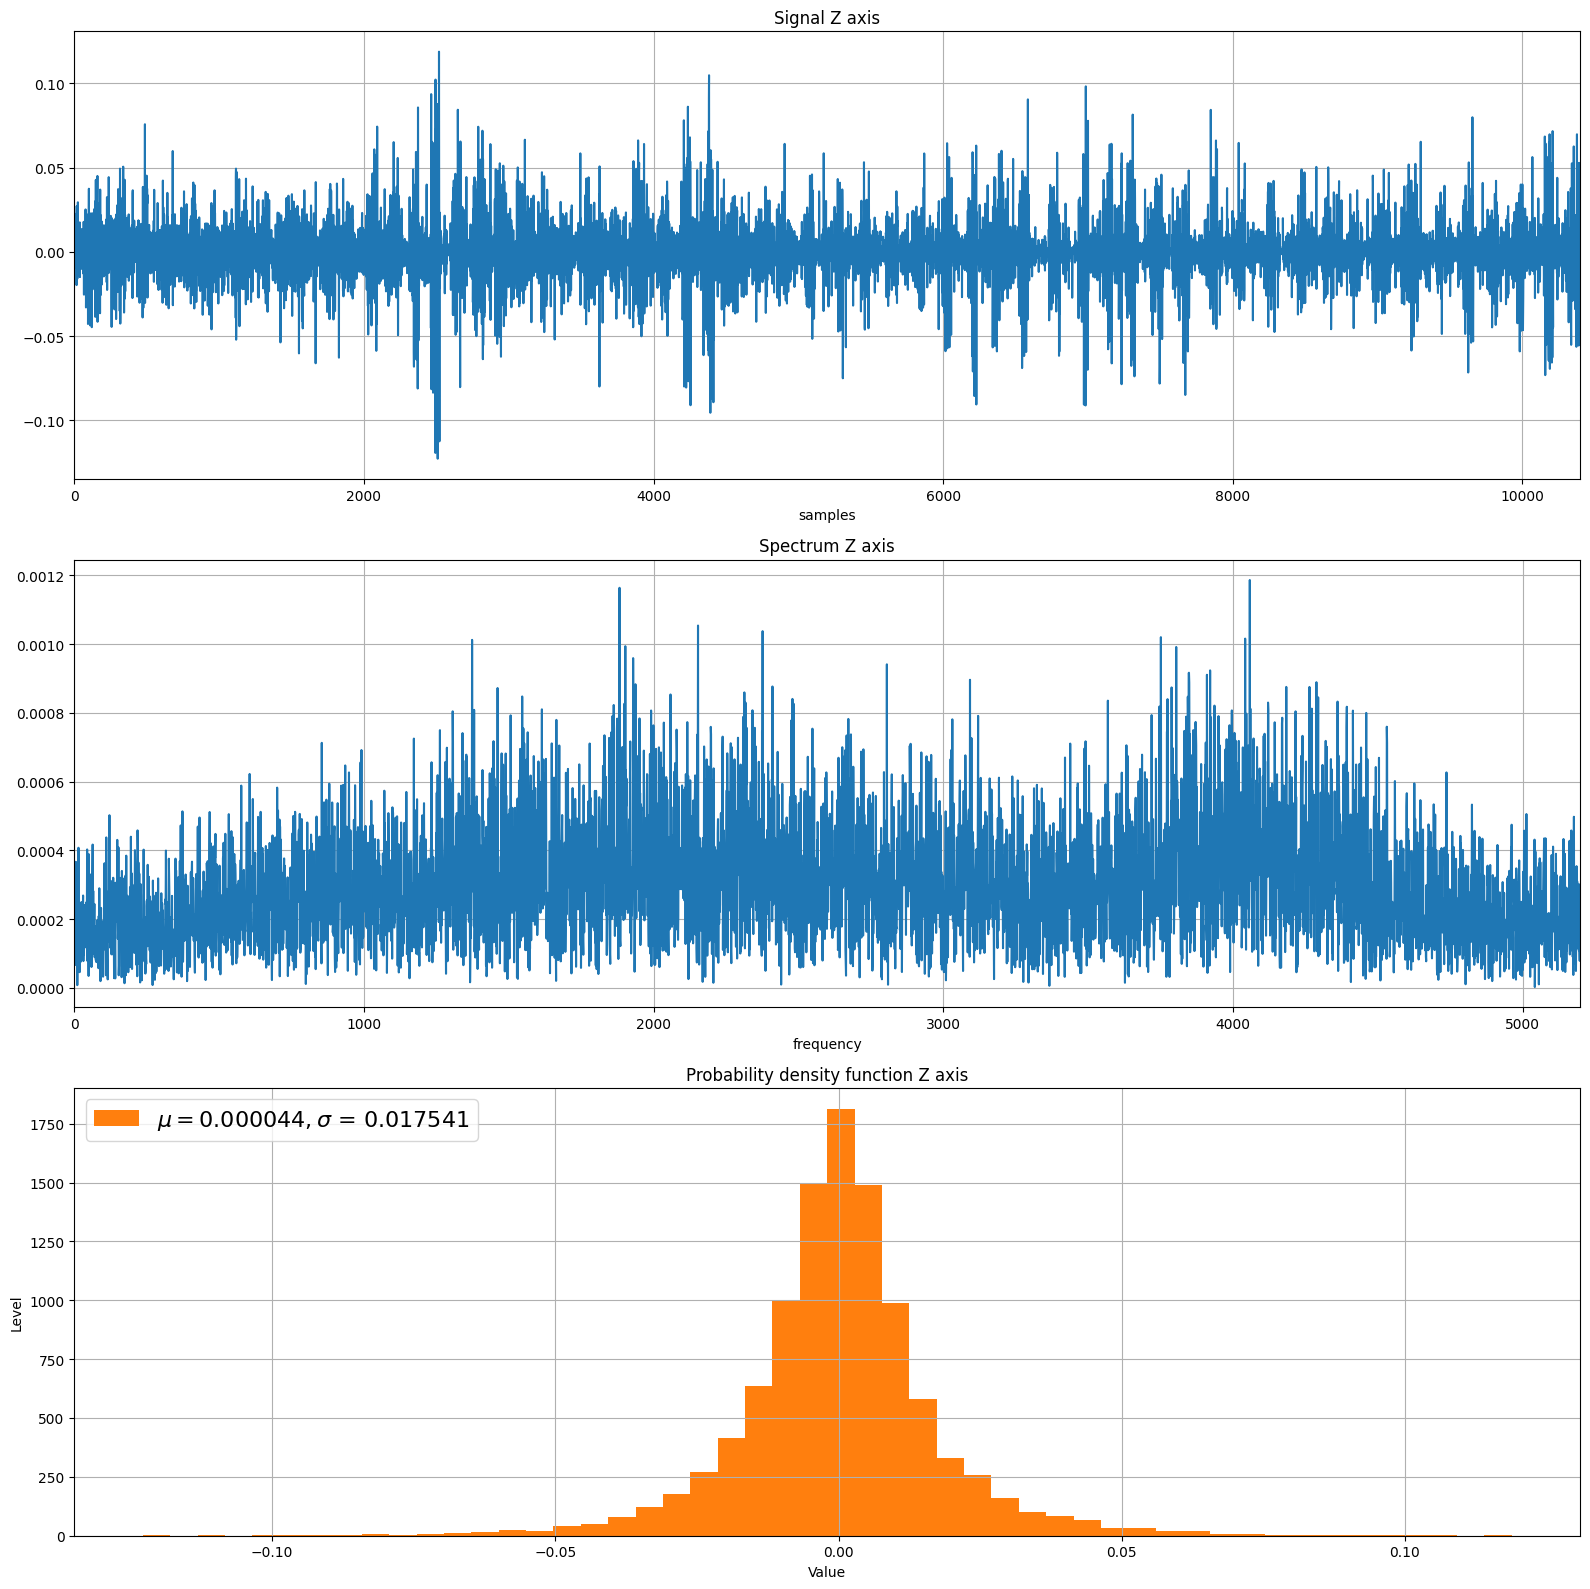

In [143]:
N = df_gyro['gyro_z'].count()
gyro_z = df_gyro['gyro_z'].to_numpy()

s = df_gyro['gyro_z'].std()
mu = df_gyro['gyro_z'].mean()    
printSignal(gyro_z, N, s, mu, 'Z axis')  
